In [4]:
import skimage
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
from PIL import ImageOps


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Viewer requires Qt
  import sys


In [5]:
from google.colab import files

Saving eins.jpg to eins.jpg


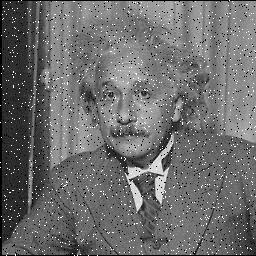

In [6]:
im2_upload = files.upload()
filename = list(im2_upload.keys())[0]

im2 = Image.open(filename)

display(im2)

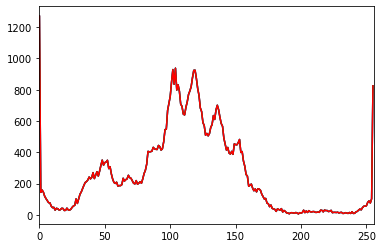

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('eins.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

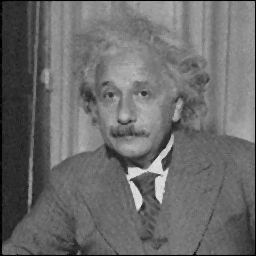

In [8]:
from PIL import Image


def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final




im = Image.open(filename)
im = im.convert("L")
arr = np.array(im)
removed_noise = median_filter(arr, 3) 
im = Image.fromarray(removed_noise)
if im.mode != 'RGB':
    im = im.convert('RGB')
display(im)
    




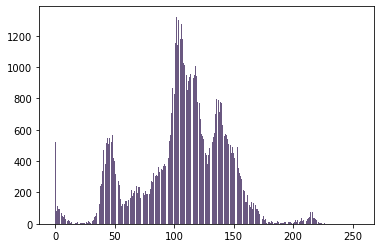

In [9]:
pl = im.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

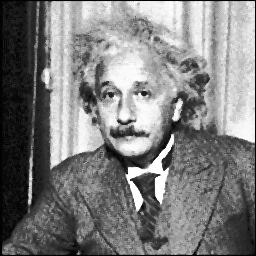

In [10]:
imEkual = ImageOps.equalize(im, mask = None)
display(imEkual)

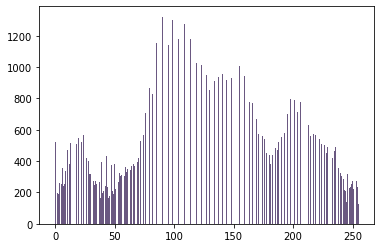

In [11]:
pl = imEkual.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()